# 読売３３３の評価

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
filename = 'report_yomiuri333.ods'
df = pd.read_excel(filename, index_col=0)
df.index = pd.to_datetime(df.index)
df

,日経225（終値）,TOPIX（終値）,読売333
Date,,,
2025-03-24,37608.49,2790.88,35507.74
2025-03-25,37780.54,2797.52,35649.12
2025-03-26,38027.29,2812.89,35757.01
2025-03-27,37799.97,2815.47,35836.16
2025-03-28,37120.33,2757.25,35178.04
2025-03-31,35617.56,2658.73,34036.32
2025-04-01,35624.48,2661.73,34057.26
2025-04-02,35725.87,2650.29,33829.17
2025-04-03,34735.93,2568.61,33080.72


In [4]:
for colname in df.columns:
    ser = df[colname] / df[colname].iloc[0]
    print(colname, ser)

日経225（終値） Date
2025-03-24    1.000000
2025-03-25    1.004575
2025-03-26    1.011136
2025-03-27    1.005091
2025-03-28    0.987020
2025-03-31    0.947062
2025-04-01    0.947246
2025-04-02    0.949942
2025-04-03    0.923619
2025-04-04    0.898217
2025-04-07    0.827914
2025-04-08    0.877796
2025-04-09    0.843268
2025-04-10    0.920244
2025-04-11    0.893032
Name: 日経225（終値）, dtype: float64
TOPIX（終値） Date
2025-03-24    1.000000
2025-03-25    1.002379
2025-03-26    1.007886
2025-03-27    1.008811
2025-03-28    0.987950
2025-03-31    0.952649
2025-04-01    0.953724
2025-04-02    0.949625
2025-04-03    0.920358
2025-04-04    0.889347
2025-04-07    0.820050
2025-04-08    0.871417
2025-04-09    0.858238
2025-04-10    0.909892
2025-04-11    0.883918
Name: TOPIX（終値）, dtype: float64
読売333 Date
2025-03-24    1.000000
2025-03-25    1.003982
2025-03-26    1.007020
2025-03-27    1.009249
2025-03-28    0.990715
2025-03-31    0.958561
2025-04-01    0.959150
2025-04-02    0.952727
2025-04-03    0.93164

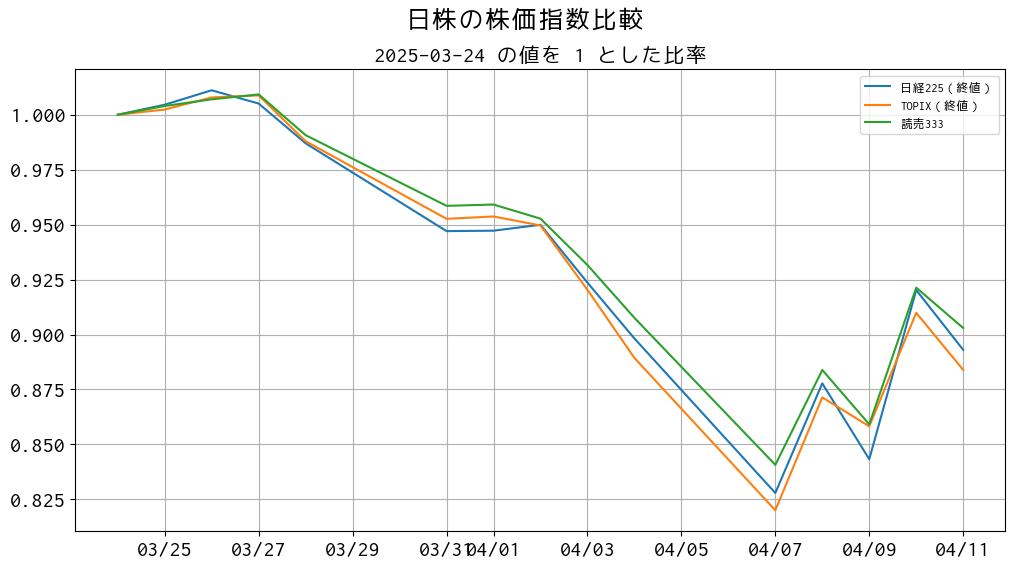

In [5]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 6))

for colname in df.columns:
    ser = df[colname] / df[colname].iloc[0]
    ax.plot(ser, label=colname)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
#ax.xaxis.set_ticks(df.index)

fig.suptitle('日株の株価指数比較')
ax.set_title('2025-03-24 の値を 1 とした比率', fontsize=16)
ax.grid()
ax.legend(loc='best', fontsize=9)

plt.savefig('report_yomiuri333.png' )
plt.show()